In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture

import warnings 
warnings.filterwarnings('ignore')

In [39]:
df = pd.read_excel('COVID-19-geographic-disbtribution-worldwide.xlsx')

In [40]:
df.shape

(61900, 12)

In [41]:
df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,2020-12-14,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,2020-12-13,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,2020-12-12,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,2020-12-11,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,2020-12-10,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658


In [42]:
df.describe()

,day,month,year,cases,deaths,popData2019,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
count,61900.000000,61900.000000,61900.000000,61900.000000,61900.000000,6.177700e+04,59021.000000
mean,15.628934,7.067157,2019.998918,1155.147237,26.055460,4.098770e+07,66.320586
std,8.841582,2.954776,0.032882,6779.224479,131.227055,1.531294e+08,162.329240
min,1.000000,1.000000,2019.000000,-8261.000000,-1918.000000,8.150000e+02,-147.419587
25%,8.000000,5.000000,2020.000000,0.000000,0.000000,1.293120e+06,0.757526
50%,15.000000,7.000000,2020.000000,15.000000,0.000000,7.169456e+06,6.724045
75%,23.000000,10.000000,2020.000000,273.000000,4.000000,2.851583e+07,52.572719
max,31.000000,12.000000,2020.000000,234633.000000,4928.000000,1.433784e+09,1900.836210


In [43]:
df.dtypes

dateRep                                                       datetime64[ns]
day                                                                    int64
month                                                                  int64
year                                                                   int64
cases                                                                  int64
deaths                                                                 int64
countriesAndTerritories                                               object
geoId                                                                 object
countryterritoryCode                                                  object
popData2019                                                          float64
continentExp                                                          object
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000           float64
dtype: object

In [44]:
df = df.drop(columns=['dateRep', 'day', 'month', 'year', 'geoId', 'countryterritoryCode'])

In [45]:
df

,cases,deaths,countriesAndTerritories,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,746,6,Afghanistan,38041757.0,Asia,9.013779
1,298,9,Afghanistan,38041757.0,Asia,7.052776
2,113,11,Afghanistan,38041757.0,Asia,6.868768
3,63,10,Afghanistan,38041757.0,Asia,7.134266
4,202,16,Afghanistan,38041757.0,Asia,6.968658
...,...,...,...,...,...,...
61895,0,0,Zimbabwe,14645473.0,Africa,NaN
61896,0,1,Zimbabwe,14645473.0,Africa,NaN
61897,0,0,Zimbabwe,14645473.0,Africa,NaN
61898,1,0,Zimbabwe,14645473.0,Africa,NaN


In [46]:
df["continentExp"] = df["continentExp"].astype('category').cat.codes

In [47]:
df = df.dropna()

In [48]:
df.describe()

,cases,deaths,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
count,59021.000000,59021.000000,5.902100e+04,59021.000000,59021.000000
mean,1211.297420,27.322783,4.121218e+07,1.654631,66.320586
std,6937.716248,134.260984,1.536882e+08,1.227840,162.329240
min,-8261.000000,-1918.000000,8.150000e+02,0.000000,-147.419587
25%,0.000000,0.000000,1.324820e+06,1.000000,0.757526
50%,20.000000,0.000000,7.813207e+06,2.000000,6.724045
75%,309.000000,5.000000,2.860872e+07,3.000000,52.572719
max,234633.000000,4928.000000,1.433784e+09,4.000000,1900.836210


In [49]:
df

,cases,deaths,countriesAndTerritories,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,746,6,Afghanistan,38041757.0,2,9.013779
1,298,9,Afghanistan,38041757.0,2,7.052776
2,113,11,Afghanistan,38041757.0,2,6.868768
3,63,10,Afghanistan,38041757.0,2,7.134266
4,202,16,Afghanistan,38041757.0,2,6.968658
...,...,...,...,...,...,...
61882,0,0,Zimbabwe,14645473.0,0,0.047796
61883,0,0,Zimbabwe,14645473.0,0,0.047796
61884,0,0,Zimbabwe,14645473.0,0,0.047796
61885,1,0,Zimbabwe,14645473.0,0,0.054624


<AxesSubplot:ylabel='Frequency'>

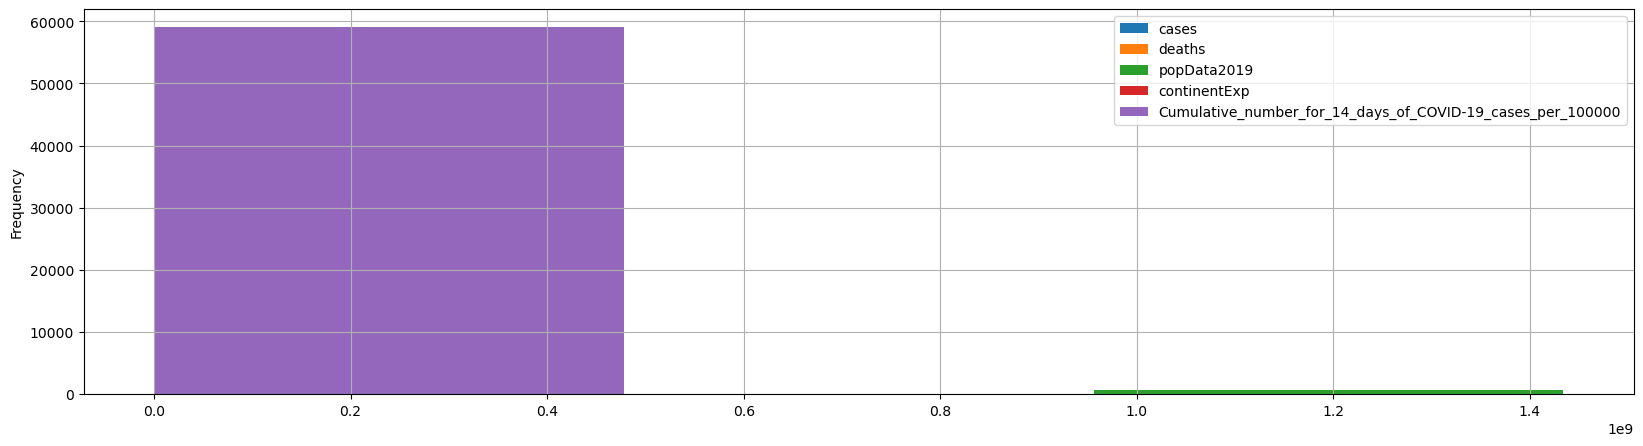

In [50]:
df.plot.hist(bins=3,figsize=(20,5),grid=True)

<AxesSubplot:ylabel='Frequency'>

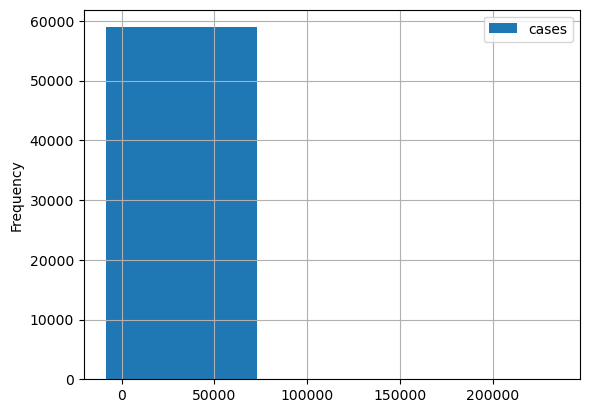

In [51]:
pd.DataFrame(df['cases']).plot.hist(bins=3,grid=True)

<AxesSubplot:>

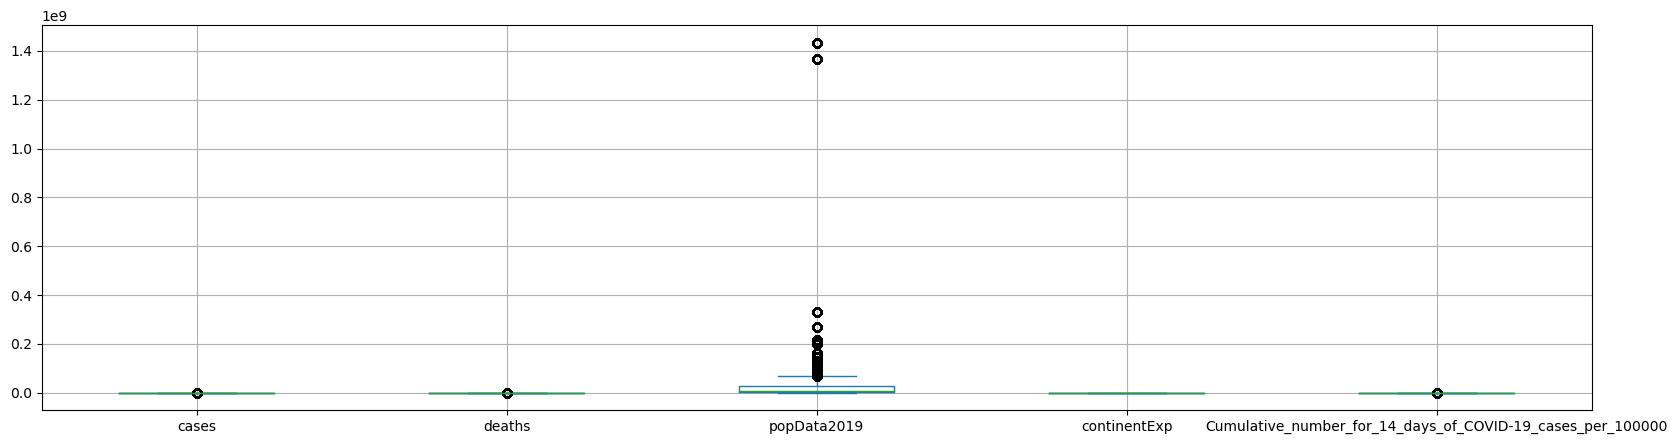

In [52]:
df.plot.box(figsize=(20,5),grid=True)

<AxesSubplot:>

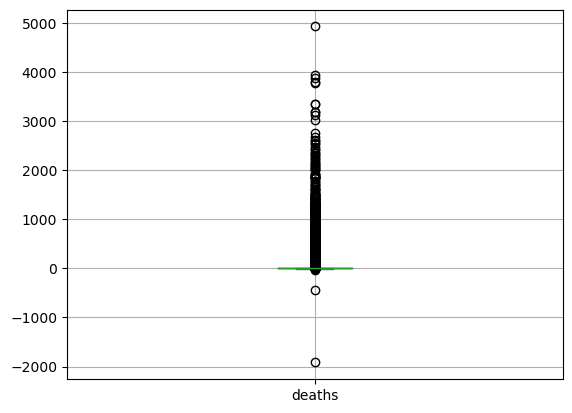

In [53]:
pd.DataFrame(df['deaths']).plot.box(grid=True)

In [54]:
df2 = pd.read_csv("healthy_life_expectancy.csv")

In [55]:
df2.head()

,Unnamed: 0,Healthy life expectancy (HALE) at birth (years),Healthy life expectancy (HALE) at birth (years).1,Healthy life expectancy (HALE) at birth (years).2,Healthy life expectancy (HALE) at birth (years).3,Healthy life expectancy (HALE) at birth (years).4,Healthy life expectancy (HALE) at birth (years).5,Healthy life expectancy (HALE) at birth (years).6,Healthy life expectancy (HALE) at birth (years).7,Healthy life expectancy (HALE) at birth (years).8,...,Healthy life expectancy (HALE) at age 60 (years).2,Healthy life expectancy (HALE) at age 60 (years).3,Healthy life expectancy (HALE) at age 60 (years).4,Healthy life expectancy (HALE) at age 60 (years).5,Healthy life expectancy (HALE) at age 60 (years).6,Healthy life expectancy (HALE) at age 60 (years).7,Healthy life expectancy (HALE) at age 60 (years).8,Healthy life expectancy (HALE) at age 60 (years).9,Healthy life expectancy (HALE) at age 60 (years).10,Healthy life expectancy (HALE) at age 60 (years).11
0,NaN,Both sexes,Both sexes,Both sexes,Both sexes,Male,Male,Male,Male,Female,...,Both sexes,Both sexes,Male,Male,Male,Male,Female,Female,Female,Female
1,Country,2019,2015,2010,2000,2019,2015,2010,2000,2019,...,2010,2000,2019,2015,2010,2000,2019,2015,2010,2000
2,Afghanistan,53.9,52.6,51.1,46.8,54.7,52.8,51.5,46.9,53.2,...,10.9,10.2,11.2,11.5,11.1,10.2,10.6,10.9,10.7,10.1
3,Albania,69.1,69.0,67.6,65.2,68.0,68.0,66.3,63.1,70.3,...,16.7,15.0,15.9,15.9,15.7,13.5,17.3,17.5,17.7,16.7
4,Algeria,66.4,66.0,65.5,62.7,66.7,66.3,65.9,62.6,66.1,...,15.6,14.6,15.9,15.8,15.5,14.6,16.2,16.0,15.7,14.7


In [56]:
df2 = df2[['Unnamed: 0', 'Healthy life expectancy (HALE) at birth (years)']]

In [57]:
df2.head()

,Unnamed: 0,Healthy life expectancy (HALE) at birth (years)
0,NaN,Both sexes
1,Country,2019
2,Afghanistan,53.9
3,Albania,69.1
4,Algeria,66.4


In [58]:
df2 = df2.replace(np.nan, 0)

In [59]:
df2

,Unnamed: 0,Healthy life expectancy (HALE) at birth (years)
0,0,Both sexes
1,Country,2019
2,Afghanistan,53.9
3,Albania,69.1
4,Algeria,66.4
...,...,...
180,Venezuela (Bolivarian Republic of),64.4
181,Viet Nam,65.3
182,Yemen,57.5
183,Zambia,54.4


In [60]:
df2 = df2.iloc[2: , :]

In [61]:
df2

,Unnamed: 0,Healthy life expectancy (HALE) at birth (years)
2,Afghanistan,53.9
3,Albania,69.1
4,Algeria,66.4
5,Angola,54.8
6,Antigua and Barbuda,67.0
...,...,...
180,Venezuela (Bolivarian Republic of),64.4
181,Viet Nam,65.3
182,Yemen,57.5
183,Zambia,54.4


In [62]:
df2.dtypes

Unnamed: 0                                         object
Healthy life expectancy (HALE) at birth (years)    object
dtype: object

In [63]:
df2 = df2.rename(columns={'Unnamed: 0': 'Country', 'Healthy life expectancy (HALE) at birth (years)': 'Hle_years'})

In [64]:
df2

,Country,Hle_years
2,Afghanistan,53.9
3,Albania,69.1
4,Algeria,66.4
5,Angola,54.8
6,Antigua and Barbuda,67.0
...,...,...
180,Venezuela (Bolivarian Republic of),64.4
181,Viet Nam,65.3
182,Yemen,57.5
183,Zambia,54.4


In [65]:
df2['Hle_years'] = df2['Hle_years'].astype(float)

In [66]:
df2['Country'] = df2['Country'].astype(str)

In [67]:
df['countriesAndTerritories'] = df['countriesAndTerritories'].astype(str)

In [68]:
df2.dtypes

Country       object
Hle_years    float64
dtype: object

In [69]:
df2.describe()

,Hle_years
count,183.000000
mean,63.318033
std,6.207037
min,44.200000
25%,58.000000
50%,64.500000
75%,67.700000
max,74.100000


In [70]:
ranges = []
for y in df2['Hle_years']:
    if y >= 40 and y <=55:
        ranges.append(0)
    elif  y >= 56 and y <=70:
        ranges.append(1)
    else:
        ranges.append(2)

In [71]:
df2['ranges'] = ranges

In [72]:
df2.head()

,Country,Hle_years,ranges
2,Afghanistan,53.9,0
3,Albania,69.1,1
4,Algeria,66.4,1
5,Angola,54.8,0
6,Antigua and Barbuda,67.0,1


In [73]:
valores = []
for d in df['countriesAndTerritories']:
    if d in df2['Country'].values:
        valores.append(df2[df2['Country']==d].values[0][1:])
    else:
        valores.append([0,0])

In [74]:
df3 = pd.DataFrame(valores,columns=['Hle_years','ranges'])
df['Hle_years'] = df3['Hle_years']
df['ranges'] = df3['ranges']

In [75]:
df

,cases,deaths,countriesAndTerritories,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,Hle_years,ranges
0,746,6,Afghanistan,38041757.0,2,9.013779,53.9,0.0
1,298,9,Afghanistan,38041757.0,2,7.052776,53.9,0.0
2,113,11,Afghanistan,38041757.0,2,6.868768,53.9,0.0
3,63,10,Afghanistan,38041757.0,2,7.134266,53.9,0.0
4,202,16,Afghanistan,38041757.0,2,6.968658,53.9,0.0
...,...,...,...,...,...,...,...,...
61882,0,0,Zimbabwe,14645473.0,0,0.047796,NaN,NaN
61883,0,0,Zimbabwe,14645473.0,0,0.047796,NaN,NaN
61884,0,0,Zimbabwe,14645473.0,0,0.047796,NaN,NaN
61885,1,0,Zimbabwe,14645473.0,0,0.054624,NaN,NaN


In [76]:
df = df.replace(np.nan, 0)

In [77]:
df

,cases,deaths,countriesAndTerritories,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,Hle_years,ranges
0,746,6,Afghanistan,38041757.0,2,9.013779,53.9,0.0
1,298,9,Afghanistan,38041757.0,2,7.052776,53.9,0.0
2,113,11,Afghanistan,38041757.0,2,6.868768,53.9,0.0
3,63,10,Afghanistan,38041757.0,2,7.134266,53.9,0.0
4,202,16,Afghanistan,38041757.0,2,6.968658,53.9,0.0
...,...,...,...,...,...,...,...,...
61882,0,0,Zimbabwe,14645473.0,0,0.047796,0.0,0.0
61883,0,0,Zimbabwe,14645473.0,0,0.047796,0.0,0.0
61884,0,0,Zimbabwe,14645473.0,0,0.047796,0.0,0.0
61885,1,0,Zimbabwe,14645473.0,0,0.054624,0.0,0.0


In [78]:
y = df['ranges']
X = df.drop(columns=['ranges'])

In [79]:
np.unique(y)

array([0., 1., 2.])

In [80]:
X.columns

Index(['cases', 'deaths', 'countriesAndTerritories', 'popData2019',
       'continentExp',
       'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000',
       'Hle_years'],
      dtype='object')

In [81]:
X["countriesAndTerritories"] = X["countriesAndTerritories"].astype('category').cat.codes
X.head()

,cases,deaths,countriesAndTerritories,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,Hle_years
0,746,6,0,38041757.0,2,9.013779,53.9
1,298,9,0,38041757.0,2,7.052776,53.9
2,113,11,0,38041757.0,2,6.868768,53.9
3,63,10,0,38041757.0,2,7.134266,53.9
4,202,16,0,38041757.0,2,6.968658,53.9


In [82]:
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)
print(X_scaler)

[[-0.06706838 -0.15881728 -1.71617892 ...  0.28128385 -0.35303124
   0.42861053]
 [-0.13164349 -0.13647255 -1.71617892 ...  0.28128385 -0.36511174
   0.42861053]
 [-0.15830955 -0.12157606 -1.71617892 ...  0.28128385 -0.3662453
   0.42861053]
 ...
 [-0.17459747 -0.20350674  1.74893428 ... -1.34760685 -0.40826502
  -1.287325  ]
 [-0.17445333 -0.20350674  1.74893428 ... -1.34760685 -0.40822296
  -1.287325  ]
 [-0.17459747 -0.20350674  1.74893428 ... -1.34760685 -0.40822296
  -1.287325  ]]


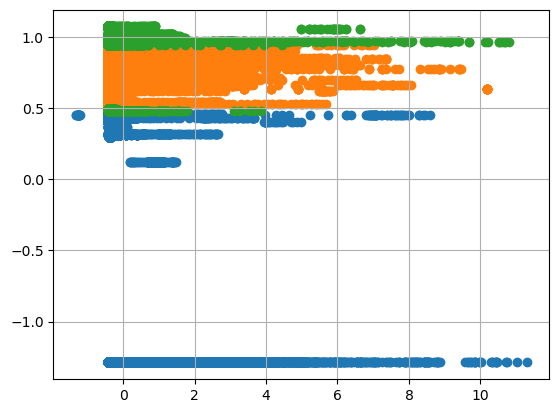

In [83]:
from matplotlib import pyplot
for class_value in range(3):
    row_ix = np.where(y.values == class_value) # obtenemos los índices de fila para las muestras dentro de esta clase
    pyplot.scatter(X_scaler[row_ix, 5], X_scaler[row_ix, 6])
plt.grid()
pyplot.show()

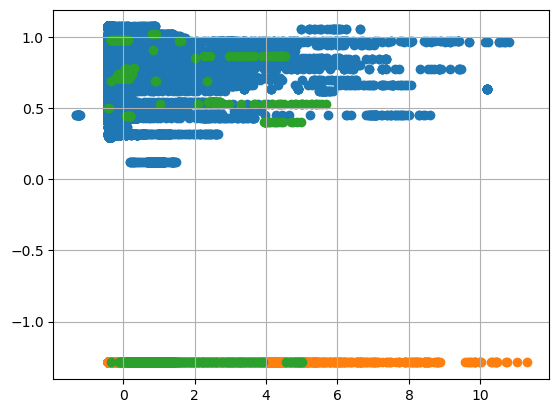

In [84]:
model = KMeans(n_clusters=3)
# ajustamos el modelo
model.fit(X_scaler)
# asignamos un cluster a cada ejemplo 
yhat = model.predict(X_scaler)
# obtenemos los clústers únicos
clusters = np.unique(yhat)
# creamos un gráfico de dispersión para las muestras de cada clú ster
for cluster in clusters:
    row_ix = np.where(yhat == cluster) # obtenemos los índices de fila para las muestras dentro de es te clúster
    pyplot.scatter(X_scaler[row_ix, 5], X_scaler[row_ix, 6]) # creamos un mapa de dispersión para estas muestras
# mostramos el gráfico
pyplot.grid()
pyplot.show()

In [85]:
# TensorFlow y tf.keras
import tensorflow as tf
from keras import *
from sklearn.model_selection import train_test_split 

In [86]:
X_train, X_validation, Y_train, Y_validation = train_test_split(X_scaler, y.astype(int), test_size=0.20, random_state=1, shuffle=True)

In [87]:
model = Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(X_train[0])]), #entrada
    layers.Dense(32, activation='relu'), #intermedia
    layers.Dense(1,activation='sigmoid')]) #salid de la familia sigmoide
model.compile(loss='binary_crossentropy',optimizer='ADAM',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                512       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,625
Trainable params: 2,625
Non-trainable params: 0
_________________________________________________________________


In [88]:
model.fit(X_train, Y_train.values, epochs=10,validation_split = 0.2)

Epoch 1/10
1181/1181 [==============================] - 4s 2ms/step - loss: -225.9809 - accuracy: 0.7727 - val_loss: -981.9854 - val_accuracy: 0.7772
Epoch 2/10
1181/1181 [==============================] - 2s 2ms/step - loss: -3152.7454 - accuracy: 0.7757 - val_loss: -6815.5254 - val_accuracy: 0.7731
Epoch 3/10
1181/1181 [==============================] - 2s 2ms/step - loss: -11822.5654 - accuracy: 0.7754 - val_loss: -19695.7188 - val_accuracy: 0.7731
Epoch 4/10
1181/1181 [==============================] - 2s 2ms/step - loss: -27587.2285 - accuracy: 0.7754 - val_loss: -40586.8203 - val_accuracy: 0.7731
Epoch 5/10
1181/1181 [==============================] - 2s 2ms/step - loss: -51302.4570 - accuracy: 0.7754 - val_loss: -70303.3359 - val_accuracy: 0.7732
Epoch 6/10
1181/1181 [==============================] - 2s 2ms/step - loss: -83596.5547 - accuracy: 0.7754 - val_loss: -109674.4062 - val_accuracy: 0.7732
Epoch 7/10
1181/1181 [==============================] - 3s 3ms/step - loss: -1255

In [89]:
#Predicción
y_pred_dnn = np.ceil(model.predict(X_validation).flatten())
#Transformar a entero las predicciones
y_pred_dnn_int = [abs(y) for y in y_pred_dnn]

369/369 [==============================] - 1s 2ms/step


In [90]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report 

In [91]:
print(classification_report(y_pred_dnn,Y_validation))

              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91      4280
         1.0       1.00      0.64      0.78      7525
         2.0       0.00      0.00      0.00         0

    accuracy                           0.77     11805
   macro avg       0.61      0.55      0.56     11805
weighted avg       0.94      0.77      0.83     11805



### con dos clusters

In [92]:
ranges = []
for y in df2['Hle_years']:
    if y >= 40 and y <=60:
        ranges.append(0)
    else:
        ranges.append(1)

In [93]:
df2['ranges'] = ranges

In [94]:
valores = []
for d in df['countriesAndTerritories']:
    if d in df2['Country'].values:
        valores.append(df2[df2['Country']==d].values[0][1:])
    else:
        valores.append([0,0])

In [95]:
df3 = pd.DataFrame(valores,columns=['Hle_years','ranges'])
df['Hle_years'] = df3['Hle_years']
df['ranges'] = df3['ranges']

In [96]:
df = df.replace(np.nan, 0)

In [97]:
df.head()

,cases,deaths,countriesAndTerritories,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,Hle_years,ranges
0,746,6,Afghanistan,38041757.0,2,9.013779,53.9,0.0
1,298,9,Afghanistan,38041757.0,2,7.052776,53.9,0.0
2,113,11,Afghanistan,38041757.0,2,6.868768,53.9,0.0
3,63,10,Afghanistan,38041757.0,2,7.134266,53.9,0.0
4,202,16,Afghanistan,38041757.0,2,6.968658,53.9,0.0


In [102]:
df.describe()

,cases,deaths,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,Hle_years,ranges
count,59021.000000,59021.000000,5.902100e+04,59021.000000,59021.000000,59021.000000,59021.000000
mean,1211.297420,27.322783,4.121218e+07,1.654631,66.320586,40.436728,0.460599
std,6937.716248,134.260984,1.536882e+08,1.227840,162.329240,31.411703,0.498449
min,-8261.000000,-1918.000000,8.150000e+02,0.000000,-147.419587,0.000000,0.000000
25%,0.000000,0.000000,1.324820e+06,1.000000,0.757526,0.000000,0.000000
50%,20.000000,0.000000,7.813207e+06,2.000000,6.724045,57.700000,0.000000
75%,309.000000,5.000000,2.860872e+07,3.000000,52.572719,66.900000,1.000000
max,234633.000000,4928.000000,1.433784e+09,4.000000,1900.836210,74.100000,1.000000


In [103]:
y = df['ranges']
X = df.drop(columns=['ranges'])

In [104]:
X["countriesAndTerritories"] = X["countriesAndTerritories"].astype('category').cat.codes
X.head()

,cases,deaths,countriesAndTerritories,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,Hle_years
0,746,6,0,38041757.0,2,9.013779,53.9
1,298,9,0,38041757.0,2,7.052776,53.9
2,113,11,0,38041757.0,2,6.868768,53.9
3,63,10,0,38041757.0,2,7.134266,53.9
4,202,16,0,38041757.0,2,6.968658,53.9


In [105]:
#Escalar los datos
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)

In [106]:
X_train, X_validation, Y_train, Y_validation = train_test_split(X_scaler, y.astype(int), test_size=0.20, random_state=1, shuffle=True)

In [107]:
model = Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(X_train[0])]), #entrada
    layers.Dense(32, activation='relu'), #intermedia
    layers.Dense(1,activation='sigmoid')]) #salid de la familia sigmoide
model.compile(loss='binary_crossentropy',optimizer='ADAM',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                512       
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,625
Trainable params: 2,625
Non-trainable params: 0
_________________________________________________________________


In [108]:
model.fit(X_train, Y_train.values, epochs=10,validation_split = 0.2)

Epoch 1/10
1181/1181 [==============================] - 4s 3ms/step - loss: 0.1084 - accuracy: 0.9630 - val_loss: 0.0181 - val_accuracy: 0.9979
Epoch 2/10
1181/1181 [==============================] - 4s 3ms/step - loss: 0.0129 - accuracy: 0.9983 - val_loss: 0.0068 - val_accuracy: 0.9992
Epoch 3/10
1181/1181 [==============================] - 3s 2ms/step - loss: 0.0065 - accuracy: 0.9989 - val_loss: 0.0036 - val_accuracy: 0.9997
Epoch 4/10
1181/1181 [==============================] - 3s 3ms/step - loss: 0.0053 - accuracy: 0.9990 - val_loss: 0.0021 - val_accuracy: 0.9997
Epoch 5/10
1181/1181 [==============================] - 3s 3ms/step - loss: 0.0046 - accuracy: 0.9988 - val_loss: 0.0021 - val_accuracy: 0.9996
Epoch 6/10
1181/1181 [==============================] - 3s 3ms/step - loss: 0.0037 - accuracy: 0.9991 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 7/10
1181/1181 [==============================] - 4s 3ms/step - loss: 0.0032 - accuracy: 0.9992 - val_loss: 0.0013 - val_accuracy:

In [109]:
#Predicción
y_pred_dnn = np.ceil(model.predict(X_validation).flatten())
#Transformar a entero las predicciones

369/369 [==============================] - 1s 1ms/step


In [110]:
print(classification_report(y_pred_dnn,Y_validation))

              precision    recall  f1-score   support

         0.0       0.66      1.00      0.80      4245
         1.0       1.00      0.72      0.83      7560

    accuracy                           0.82     11805
   macro avg       0.83      0.86      0.82     11805
weighted avg       0.88      0.82      0.82     11805



In [111]:
y_pred_dnn

array([0., 1., 1., ..., 1., 1., 1.], dtype=float32)

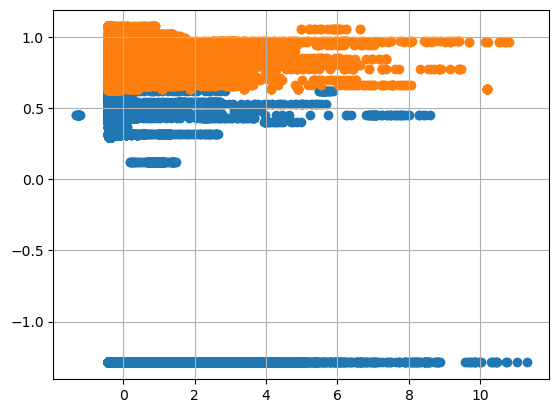

In [112]:
for class_value in range(2):
    row_ix = np.where(y.values == class_value) # obtenemos los índices de fila para las muestras dentro de esta clase
    pyplot.scatter(X_scaler[row_ix, 5], X_scaler[row_ix, 6])
plt.grid()
pyplot.show()

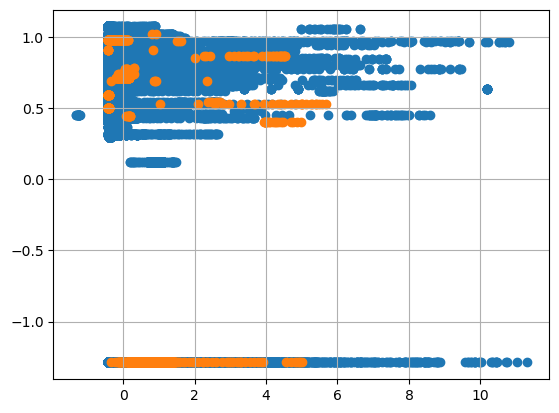

In [113]:
model = KMeans(n_clusters=2)
# ajustamos el modelo
model.fit(X_scaler)
# asignamos un cluster a cada ejemplo 
yhat = model.predict(X_scaler)
# obtenemos los clústers únicos
clusters = np.unique(yhat)
# creamos un gráfico de dispersión para las muestras de cada clú ster
for cluster in clusters:
    row_ix = np.where(yhat == cluster) # obtenemos los índices de fila para las muestras dentro de es te clúster
    pyplot.scatter(X_scaler[row_ix, 5], X_scaler[row_ix, 6]) # creamos un mapa de dispersión para estas muestras
# mostramos el gráfico
pyplot.grid()
pyplot.show()